<a href="https://colab.research.google.com/github/NicolasB7/PID/blob/Nicolas/Prevenci%C3%B3n_Inteligente_del_Dengue_(PID).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONECTARSE A DRIVE.**

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**SE IMPORTAN LAS BASE DE DATOS Y SE CREA UN DATAFRAME.**

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

d2020 = 'drive/Shareddrives/PID/Dengue/dengue_abierto2020.csv'
d2021 = 'drive/Shareddrives/PID/Dengue/dengue_abierto2021.csv'
d2022 = 'drive/Shareddrives/PID/Dengue/dengue_abierto2022.csv'
d2023 = 'drive/Shareddrives/PID/Dengue/dengue_abierto2023.csv'
datosHistoricos = pd.concat(map(pd.read_csv, [d2020, d2021, d2022, d2023]), ignore_index=True)
datosHistoricos

,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
0,2020-12-30,404569,2,63,28,33,2,1,28,33,...,2,2,2,2,5.0,1,5,2,28,33
1,2020-12-30,760644,1,42,18,8,2,2,18,17,...,2,2,2,2,5.0,2,5,1,18,8
2,2020-12-30,760647,2,16,31,96,2,2,31,96,...,2,2,2,2,5.0,2,5,1,31,96
3,2020-12-30,760654,1,76,12,1,2,2,12,1,...,2,2,2,2,5.0,1,5,3,12,1
4,2020-12-30,760657,1,20,30,142,2,2,30,116,...,2,2,2,2,5.0,1,5,2,30,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221741,2023-03-13,1006226,2,29,23,5,2,2,23,5,...,2,2,2,2,5.0,1,3,2,23,5
221742,2023-03-13,1006242,1,12,23,5,2,2,23,5,...,2,2,2,2,5.0,2,5,1,23,5
221743,2023-03-13,1006245,1,42,23,5,2,2,23,5,...,2,2,2,2,5.0,1,3,2,23,5
221744,2023-03-13,1006264,2,1,23,5,2,2,23,5,...,2,2,2,2,5.0,2,5,1,23,5


**DESCRIPTOR DE TERMINOS.**

In [59]:
pd.read_excel('drive/Shareddrives/PID/Dengue/Descriptores_Dengue.xlsx') # Descriptor de terminos.

,NO.,NOMBRE DE VARIABLE,DESCRIPCION,FORMATO O FUENTE
0,1,FECHA_ACTUALIZACION,LA BASE DE DATOS SE ACTUALIZA SEMANALMENTE. ES...,"AAAA-MM-DD, 9999-99-99: CUANDO NO HAY REGISTRO"
1,2,ID_REGISTRO,NÚMERO DE INDETIFICADOR DEL CASO,TEXTO
2,3,SEXO,IDENTIFICA EL SEXO DEL PACIENTE,CATÁLOGO: SEXO
3,4,EDAD_ANOS,IDENTIFICA LA EDAD EN AÑOS DEL PACIENTE,NÚMERICA EN AÑOS
4,5,ENTIDAD_RES,IDENTIFICA LA ENTIDAD DE RESIDENCIA DEL PACIENTE,CATÁLOGO: ENTIDADES
5,6,MUNICIPIO_RES,IDENTIFICA EL MUNICIPIO DE RESIDENCIA DEL PACI...,CATÁLOGO: MUNICIPIOS
6,7,HABLA_LENGUA_INDIG,IDENTIFICA SI EL PACIENTE HABLA LENGUA INDIGENA,CATÁLOGO: SI /NO
7,8,INDIGENA,IDENTIFICA SI EL PACIENTE SE AUTOIDENTIFICA CO...,CATÁLOGO: SI /NO
8,9,ENTIDAD_UM_NOTIF,IDENTIFICA LA ENTIDAD DONDE SE ENCUENTRA LA UN...,CATÁLOGO: ENTIDADES
9,10,MUNICIPIO_UM_NOTIF,IDENTIFICA EL MUNICIPIO DONDE SE ENCUENTRA LA ...,CATÁLOGO: MUNICIPIOS


**HOJAS DEL CATALOGO.**

In [60]:
hojas = pd.read_excel('drive/Shareddrives/PID/Dengue/Catálogos_Dengue.xlsx', sheet_name=None) # Hojas del catalogo
catalogo = []
catalogo = list(hojas.keys())
print(catalogo)

['CATÁLOGO ESTATUS_CASO', 'CATALOGO RESULTADO_PCR ', 'CATÁLOGO DICTAMEN', 'CATÁLOGO INSTITUCION', 'CATÁLOGO TIPO_PACIENTE', 'CATÁLOGO MUNICIPIO', 'CATÁLOGO ENTIDAD', 'CATALOGO SI_NO', 'CATÁLOGO SEXO']


**SE BUSCA A JALISCO EN EL CATALOGO ENTIDAD.**

In [61]:
entidades = pd.read_excel('drive/Shareddrives/PID/Dengue/Catálogos_Dengue.xlsx', sheet_name='CATÁLOGO ENTIDAD') # SE BUSCA A JALISCO EN EL CATALOGO ENTIDAD
jalisco = entidades[entidades.ENTIDAD_FEDERATIVA.eq('JALISCO')]
jalisco

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA
13,14,JALISCO,JC


**CASOS EN JALISCO.**

In [62]:
casosEnJalisco = datosHistoricos[datosHistoricos.ENTIDAD_UM_NOTIF.eq(14)] # Casos en Jalisco
casosEnJalisco

,FECHA_ACTUALIZACION,ID_REGISTRO,SEXO,EDAD_ANOS,ENTIDAD_RES,MUNICIPIO_RES,HABLA_LENGUA_INDIG,INDIGENA,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,...,INMUNOSUPR,CIRROSIS_HEPATICA,EMBARAZO,DEFUNCION,DICTAMEN,TOMA_MUESTRA,RESULTADO_PCR,ESTATUS_CASO,ENTIDAD_ASIG,MUNICIPIO_ASIG
13,2020-12-30,760702,2,46,14,39,2,2,14,39,...,2,2,2,2,5.0,2,5,1,14,39
17,2020-12-30,760721,2,45,14,67,2,2,14,67,...,2,2,2,2,5.0,2,5,1,14,67
20,2020-12-30,760737,2,32,14,98,2,2,14,39,...,2,2,2,2,5.0,2,5,1,14,98
29,2020-12-30,760773,1,22,14,39,2,2,14,39,...,2,2,2,2,5.0,1,5,3,14,39
94,2020-12-30,760241,2,12,18,20,2,2,14,67,...,2,2,2,2,5.0,1,2,2,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221560,2023-03-13,1004057,2,27,14,97,2,2,14,97,...,2,2,2,2,5.0,1,5,3,14,97
221655,2023-03-13,1011993,1,6,14,85,2,2,14,85,...,2,2,2,2,5.0,1,5,1,6,2
221683,2023-03-13,1011688,1,19,14,22,2,2,14,22,...,2,2,2,2,5.0,1,5,3,14,22
221724,2023-03-13,1006020,2,35,14,67,2,2,14,67,...,2,2,2,2,5.0,1,5,3,99,999


**SE BUSCA LA CLAVE DE CASOS CONFIRMADOS.**

In [63]:
pd.read_excel('drive/Shareddrives/PID/Dengue/Catálogos_Dengue.xlsx', sheet_name=catalogo[0]) # Se busca la clave de casos confirmados

,CLAVE,DESCRIPCIÓN
0,1,PROBABLE
1,2,CONFIRMADO
2,3,DESCARTADO


**CASOS CONFIRMADOS EN JALISCO.**

In [64]:
casosEnJaliscoConfirmados = casosEnJalisco[casosEnJalisco.ESTATUS_CASO.eq(2)] # Casos confirmados
casosEnJaliscoConfirmados = casosEnJaliscoConfirmados[['FECHA_SIGN_SINTOMAS','MUNICIPIO_UM_NOTIF','ESTATUS_CASO']]
casosEnJaliscoConfirmados

,FECHA_SIGN_SINTOMAS,MUNICIPIO_UM_NOTIF,ESTATUS_CASO
94,2020-01-01,67,2
105,2020-01-02,39,2
335,2020-01-04,39,2
371,2020-01-05,39,2
390,2020-01-02,67,2
...,...,...,...
216738,2023-01-09,99,2
216925,2023-02-27,93,2
217404,2023-02-25,22,2
217518,2023-01-18,22,2


**MUNICIPIOS DE JALISCO.**

In [65]:
municipios = pd.read_excel('drive/Shareddrives/PID/Dengue/Catálogos_Dengue.xlsx', sheet_name=catalogo[5]) # Se busca los municipios del estado de Jalisco
municipiosJalisco = municipios[municipios.CLAVE_ENTIDAD.eq('14')]
municipiosJalisco

,CLAVE_MUNICIPIO,MUNICIPIO,CLAVE_ENTIDAD
549,1,ACATIC,14
550,2,ACATLÁN DE JUÁREZ,14
551,3,AHUALULCO DE MERCADO,14
552,4,AMACUECA,14
553,5,AMATITÁN,14
...,...,...,...
670,122,ZAPOTITLÁN DE VADILLO,14
671,123,ZAPOTLÁN DEL REY,14
672,124,ZAPOTLANEJO,14
673,125,SAN IGNACIO CERRO GORDO,14


**CLAVE DE MUNICIPIO**

In [66]:
municipio = municipiosJalisco[municipiosJalisco.MUNICIPIO.eq('ZAPOPAN')]
municipio = list(municipio.CLAVE_MUNICIPIO)
print('LA CLAVE DEL MUNICIPIO ES: ',municipio[0])

LA CLAVE DEL MUNICIPIO ES:  120


**CONTAGIOS CONFIRMADOS EN EL MUNICIPIO DE ZAPOPAN.**

In [67]:
casosConfirmadosEnZapopan = casosEnJaliscoConfirmados[casosEnJaliscoConfirmados.MUNICIPIO_UM_NOTIF.eq(int(municipio[0]))] #Contagios en el municipio de Zapopan
casosConfirmadosEnZapopan

,FECHA_SIGN_SINTOMAS,MUNICIPIO_UM_NOTIF,ESTATUS_CASO
1616,2020-01-06,120,2
2424,2020-01-12,120,2
4080,2020-01-11,120,2
4552,2020-01-22,120,2
4773,2020-01-15,120,2
...,...,...,...
203621,2022-10-07,120,2
205974,2022-07-31,120,2
208915,2022-05-23,120,2
209899,2022-06-08,120,2


**TODO JALISCO**

In [68]:
casosEnJaliscoConfirmados

,FECHA_SIGN_SINTOMAS,MUNICIPIO_UM_NOTIF,ESTATUS_CASO
94,2020-01-01,67,2
105,2020-01-02,39,2
335,2020-01-04,39,2
371,2020-01-05,39,2
390,2020-01-02,67,2
...,...,...,...
216738,2023-01-09,99,2
216925,2023-02-27,93,2
217404,2023-02-25,22,2
217518,2023-01-18,22,2


**Convertir la columna de fechas a un formato de fecha**

In [69]:
casosConfirmadosEnZapopan['FECHA_SIGN_SINTOMAS'] = pd.to_datetime(casosConfirmadosEnZapopan['FECHA_SIGN_SINTOMAS'])

<ipython-input-69-479fa34f044f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casosConfirmadosEnZapopan['FECHA_SIGN_SINTOMAS'] = pd.to_datetime(casosConfirmadosEnZapopan['FECHA_SIGN_SINTOMAS'])


**SE FILTRA POR AÑO**

In [70]:
year = 2020
df_por_year = casosConfirmadosEnZapopan[(casosConfirmadosEnZapopan['FECHA_SIGN_SINTOMAS'].dt.year == year)]
df_por_year

,FECHA_SIGN_SINTOMAS,MUNICIPIO_UM_NOTIF,ESTATUS_CASO
1616,2020-01-06,120,2
2424,2020-01-12,120,2
4080,2020-01-11,120,2
4552,2020-01-22,120,2
4773,2020-01-15,120,2
...,...,...,...
115244,2020-11-30,120,2
117713,2020-12-08,120,2
118505,2020-11-29,120,2
118731,2020-12-03,120,2


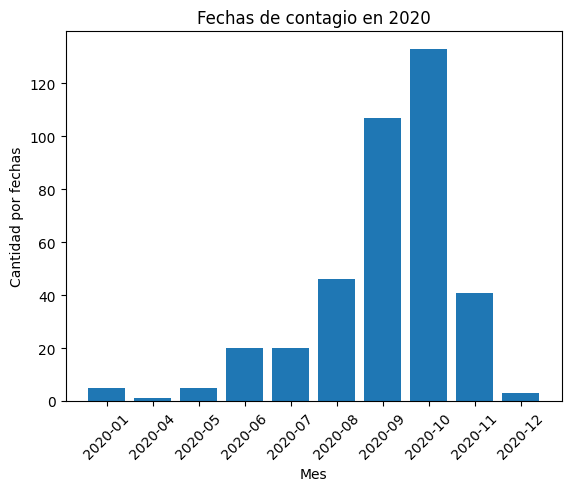

In [71]:
conteo_por_mes = df_por_year.groupby(df_por_year['FECHA_SIGN_SINTOMAS'].dt.strftime('%Y-%m'))['FECHA_SIGN_SINTOMAS'].count()

# Crear una gráfica de barras de las fechas por mes
plt.bar(conteo_por_mes.index, conteo_por_mes)
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Cantidad por fechas')
plt.title('Fechas de contagio en '+ str(year))
plt.show()

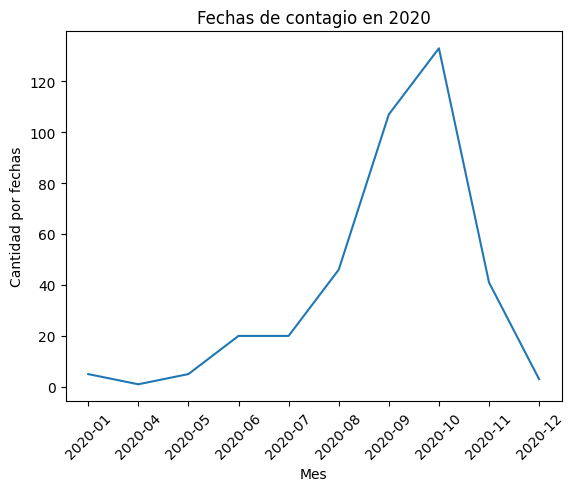

In [72]:
plt.plot(conteo_por_mes.index, conteo_por_mes)
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Cantidad por fechas')
plt.title('Fechas de contagio en '+ str(year))
plt.show()

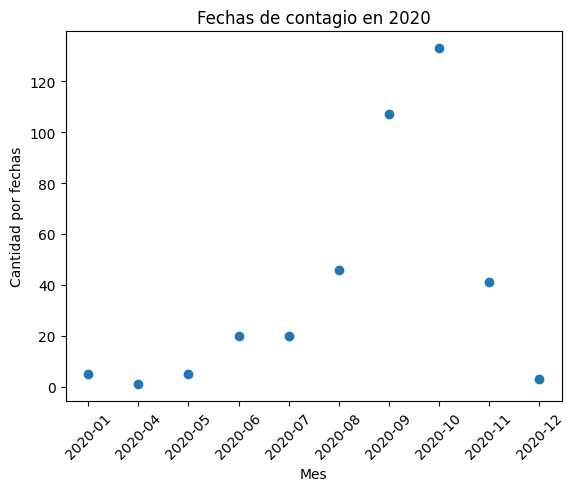

In [73]:
plt.scatter(conteo_por_mes.index, conteo_por_mes)
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Cantidad por fechas')
plt.title('Fechas de contagio en '+ str(year))
plt.show()

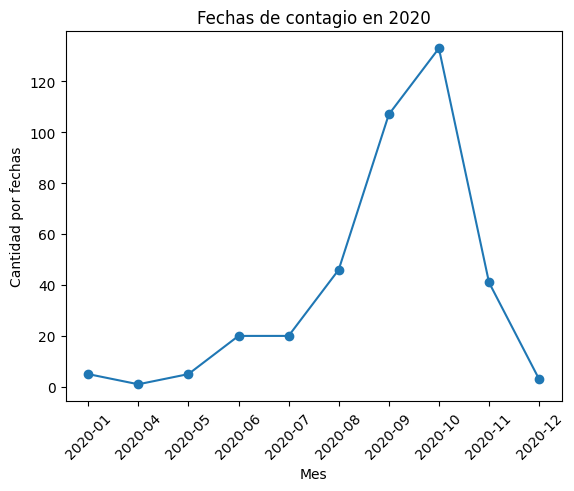

In [74]:
plt.plot(conteo_por_mes.index, conteo_por_mes, 'o-')
plt.xticks(rotation=45)
plt.xlabel('Mes')
plt.ylabel('Cantidad por fechas')
plt.title('Fechas de contagio en '+ str(year))
plt.show()

**CREARCION DE DATAFRAME PARA ENTRENAR EL MODELO**

In [75]:
datosCopy = datosHistoricos[['ENTIDAD_UM_NOTIF','MUNICIPIO_UM_NOTIF','FECHA_SIGN_SINTOMAS','ESTATUS_CASO']]
datosCopy = datosCopy[datosCopy.ESTATUS_CASO.eq(2)] # Casos confirmados
datosCopy

,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,FECHA_SIGN_SINTOMAS,ESTATUS_CASO
0,28,33,2020-10-28,2
4,30,116,2020-01-02,2
8,15,82,2020-01-05,2
10,12,1,2020-01-02,2
11,18,15,2020-01-02,2
...,...,...,...,...
221729,23,999,2023-01-29,2
221731,23,5,2023-01-31,2
221740,23,5,2023-02-01,2
221741,23,5,2023-01-31,2


In [76]:
datosCopy['FECHA_SIGN_SINTOMAS'] = pd.to_datetime(datosCopy['FECHA_SIGN_SINTOMAS'])
#datosCopy['Dia'] = datosCopy['FECHA_SIGN_SINTOMAS'].dt.day
datosCopy['Mes'] = datosCopy['FECHA_SIGN_SINTOMAS'].dt.month
datosCopy['Year'] = datosCopy['FECHA_SIGN_SINTOMAS'].dt.year
datosCopy = datosCopy[['ENTIDAD_UM_NOTIF','MUNICIPIO_UM_NOTIF','Mes', 'Year','ESTATUS_CASO']]
datosCopy

,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,Mes,Year,ESTATUS_CASO
0,28,33,10,2020,2
4,30,116,1,2020,2
8,15,82,1,2020,2
10,12,1,1,2020,2
11,18,15,1,2020,2
...,...,...,...,...,...
221729,23,999,1,2023,2
221731,23,5,1,2023,2
221740,23,5,2,2023,2
221741,23,5,1,2023,2


In [77]:
# Agrupa por municipio, mes y año, y calcula el total de casos
df_agrupado = datosCopy.groupby(['ENTIDAD_UM_NOTIF', 'MUNICIPIO_UM_NOTIF','Mes', 'Year'])['ESTATUS_CASO'].count().reset_index()

# Elimina los registros con NaN (debido a la operación shift)
df_agrupado = df_agrupado.dropna()

# Muestra los resultados
df_agrupado

,ENTIDAD_UM_NOTIF,MUNICIPIO_UM_NOTIF,Mes,Year,ESTATUS_CASO
0,1,1,3,2020,1
1,1,1,8,2020,2
2,1,1,10,2020,1
3,1,1,11,2020,1
4,2,1,1,2020,2
...,...,...,...,...,...
5685,32,33,6,2020,1
5686,32,44,10,2020,9
5687,32,55,9,2020,1
5688,32,55,10,2020,2


**EXPORTAR DATA FRAME**

In [78]:
from google.colab import files

# Guarda el DataFrame como archivo CSV en el directorio actual
df_agrupado.to_csv('datos_dengue_agrupados.csv', index=False)

# Descarga el archivo CSV desde Google Colab
files.download('datos_dengue_agrupados.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**ENTRENAMIENTO DEL MODELO**

**CREACION DEL MODELO USANDO REGRESION LINEAL**

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Seleccionar las columnas que nos interesan
# Crear matriz X
X = df_agrupado[['ENTIDAD_UM_NOTIF', 'MUNICIPIO_UM_NOTIF', 'Year']]
# Crear matriz y
y = df_agrupado['ESTATUS_CASO']


#Dividir los datos en conjuntos de entrenamiento y prueba (recuerda que el propio data set se divide en 2)
X_entrenamiento, X_test, y_entrenamiento, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)

# Entrenar el modelo con los datos del entrenamiento
modelo = LinearRegression()
modelo.fit(X_entrenamiento, y_entrenamiento)

LinearRegression()

**Realizar predicciones**

In [80]:
# Hacer predicciones sobre los datos de prueba
y_pred = modelo.predict(X_test)

**Evaluar el rendimiento del modelo**

In [81]:
# Evaluar el rendimiento del modelo
from sklearn.metrics import r2_score

y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de determinación: {r2}')

Coeficiente de determinación: 0.001948819877171104


**Realizar prediciones para futuros años en Zapopan**

In [82]:
# Hacer una predicción sobre el número de casos de dengue en Zapopan en un año y mes digitado
nuevos_datos = [[14,120,2023]]
prediccion = modelo.predict(nuevos_datos)
print('Predicción del número de casos de dengue en Zapopan:', prediccion)

Predicción del número de casos de dengue en Zapopan: [5.49145547]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**MODELO PARA VISUALIZAR**

In [83]:
zapopan = casosConfirmadosEnZapopan[['FECHA_SIGN_SINTOMAS','ESTATUS_CASO']]
zapopan = zapopan[zapopan.ESTATUS_CASO.eq(2)] # Casos confirmados
zapopan['FECHA_SIGN_SINTOMAS'] = pd.to_datetime(zapopan['FECHA_SIGN_SINTOMAS'])
#datosCopy['Dia'] = datosCopy['FECHA_SIGN_SINTOMAS'].dt.day
zapopan['Mes'] = zapopan['FECHA_SIGN_SINTOMAS'].dt.month
zapopan['Year'] = zapopan['FECHA_SIGN_SINTOMAS'].dt.year
zapopan = zapopan[['Mes', 'Year','ESTATUS_CASO']]
# Agrupa por municipio, mes y año, y calcula el total de casos
df_agrupadoZA = zapopan.groupby(['Mes', 'Year'])['ESTATUS_CASO'].count().reset_index()
# Elimina los registros con NaN (debido a la operación shift)
df_agrupadoZA = df_agrupadoZA.dropna()
# Muestra los resultados
df_agrupadoZA

,Mes,Year,ESTATUS_CASO
0,1,2020,5
1,1,2022,1
2,1,2023,1
3,4,2020,1
4,4,2021,1
5,5,2020,5
6,5,2021,1
7,5,2022,4
8,6,2020,20
9,6,2022,1


In [84]:
X = df_agrupadoZA[['Year', 'Mes']]
y = df_agrupadoZA['ESTATUS_CASO']

# Entrenar modelo de regresión lineal
reg = LinearRegression().fit(X, y)

df_meses = pd.DataFrame({'Mes': range(1, 13)}) 
year_pred = 2030

# Crear DataFrame con los meses y año a predecir
df_prediccion = pd.DataFrame({
    "Year": year_pred,
    "Mes": df_meses['Mes']
})

# Predecir contagios para cada mes y año
y_pred = reg.predict(df_prediccion[['Year', 'Mes']])

# Agregar predicciones al DataFrame con meses y años a predecir
df_prediccion['Contagios'] = y_pred

# Mostrar el DataFrame con la predicción
print(df_prediccion)

    Year  Mes   Contagios
0   2030    1 -129.119687
1   2030    2 -126.926039
2   2030    3 -124.732390
3   2030    4 -122.538742
4   2030    5 -120.345093
5   2030    6 -118.151444
6   2030    7 -115.957796
7   2030    8 -113.764147
8   2030    9 -111.570498
9   2030   10 -109.376850
10  2030   11 -107.183201
11  2030   12 -104.989553


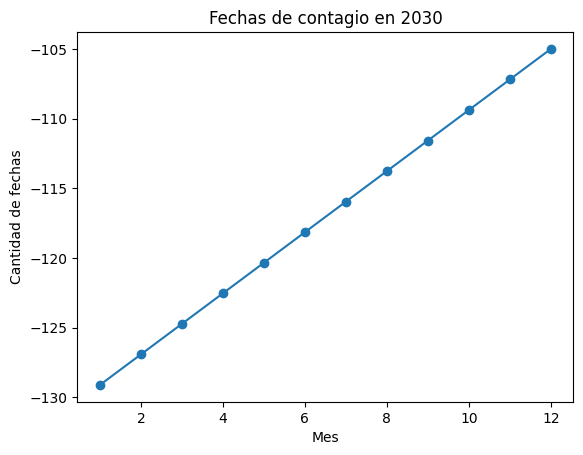

In [85]:
plt.plot(df_prediccion['Mes'], df_prediccion['Contagios'], '-o')
plt.xlabel('Mes')
plt.ylabel('Cantidad de fechas')
plt.title('Fechas de contagio en '+ str(year_pred))
plt.show()